In [198]:
import numpy as np
import pandas as pd

df = pd.read_csv('test4.csv')
df

,식당명,분류명,행정동명,위도,경도,평점,방문자리뷰수
0,카페드파리,카페,명동,37.562711,126.983746,4.26,345
1,몰또이탈리안에소프레소바,카페,명동,37.564577,126.986213,4.41,5426
2,르빵명동성당점,카페,명동,37.563240,126.987005,4.47,694
3,가배도명동,카페,명동,37.560576,126.985138,4.44,616
4,명동아지트,카페,명동,37.561961,126.985403,3.00,175
...,...,...,...,...,...,...,...
68,리사르커피 명동점,카페,명동,37.561843,126.988244,4.52,108
69,가배도 명동,카페,명동,37.560579,126.985184,4.44,616
70,에쎄레젤라또,카페,명동,37.563457,126.986843,4.45,921
71,크림시크,카페,명동,37.564575,126.984028,4.72,1325


In [199]:
df.columns= ['name',
             'cate',
             'dong',
             'lon',
             'lat',
             'score',
             'review',
             ]
df

,name,cate,dong,lon,lat,score,review
0,카페드파리,카페,명동,37.562711,126.983746,4.26,345
1,몰또이탈리안에소프레소바,카페,명동,37.564577,126.986213,4.41,5426
2,르빵명동성당점,카페,명동,37.563240,126.987005,4.47,694
3,가배도명동,카페,명동,37.560576,126.985138,4.44,616
4,명동아지트,카페,명동,37.561961,126.985403,3.00,175
...,...,...,...,...,...,...,...
68,리사르커피 명동점,카페,명동,37.561843,126.988244,4.52,108
69,가배도 명동,카페,명동,37.560579,126.985184,4.44,616
70,에쎄레젤라또,카페,명동,37.563457,126.986843,4.45,921
71,크림시크,카페,명동,37.564575,126.984028,4.72,1325


In [279]:
import numpy as np

food_score = np.array([4.26, 4.41, 4.47, 4.44, 3, 3.5, 4.55, 2.7, 4.42, 1.1,
4.42, 4.35, 4.49, 4.06, 4.44, 4.22, 4.43, 4.35, 4.35, 4.41,
4.56, 4.23, 4.41, 4.41, 4.66, 4.25, 4.14, 3.92, 4.27, 4.43,
4.21, 4.56, 4.32, 4.6, 4.69, 4.32, 4.03, 4.41, 4.12, 4.25,
3.89, 4.55, 4.21, 4.45, 3.95, 4.13, 4.21, 4.08, 4.15, 4.43,
3.67, 4.59, 3.81, 4.26, 4.31, 4.3, 4.24, 4.4, 4.34, 3.74,
4.37, 4.3, 4.68, 4.32, 4.47, 4.42, 4.26, 4.52,4.45, 4.72,
4.57])

food_reviews = np.array([345, 5426, 694, 616, 175, 823, 1772, 148, 3830, 501,
12711, 2188, 2577, 3654, 4859, 3279, 4858, 1106, 2993, 887,
3889, 2936, 1539, 5539, 13852, 1821, 1006, 397, 1749, 1006,
282, 3889, 878, 2537, 407, 910, 220, 847, 1320, 738,
1447, 333, 1449, 921, 405, 978, 491, 382, 285, 4861,
514, 5069, 970, 760, 456, 1849, 948, 776, 453, 417,
1981, 515, 371, 593, 1033, 760, 345, 108,
921, 1325, 809])


ValueError: x and y must be the same size

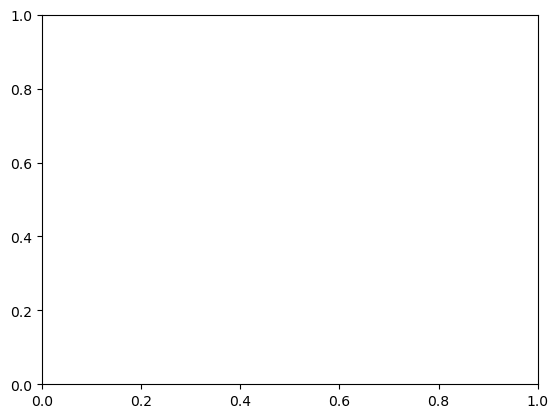

In [280]:
import matplotlib.pyplot as plt

plt.scatter(food_score, food_reviews)
plt.xlabel('score')
plt.ylabel('reviews')
plt.show()

In [242]:
bad_score = np.array([1.56, 1.32, 1.95, 1.52, 1.43, 1.38, 1.81, 1.28, 1.76, 1.49])

bad_reviews = np.array([157, 382, 124, 153, 1620, 3372, 147, 270, 851, 297])

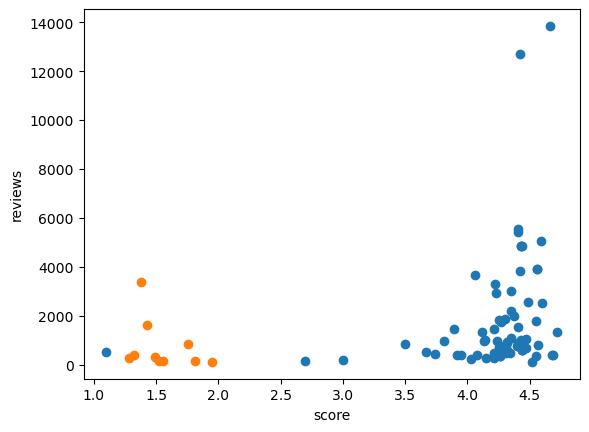

In [239]:
plt.scatter(food_score, food_reviews)
plt.scatter(bad_score, bad_reviews)
plt.xlabel('score')
plt.ylabel('reviews')
plt.show()

In [249]:
score = np.concatenate((food_score, bad_score))
reviews = np.concatenate((food_reviews, bad_reviews))

In [251]:
sum_data = [[s, r] for s, r in zip(score, reviews)]

In [252]:
print(sum_data)

[[4.26, 345], [4.41, 5426], [4.47, 694], [4.44, 616], [3.0, 175], [3.5, 823], [4.55, 1772], [2.7, 148], [4.42, 3830], [1.1, 501], [4.42, 12711], [4.35, 2188], [4.49, 2577], [4.06, 3654], [4.44, 4859], [4.22, 3279], [4.43, 4858], [4.35, 1106], [4.35, 2993], [4.41, 887], [4.56, 3889], [4.23, 2936], [4.41, 1539], [4.41, 5539], [4.66, 13852], [4.25, 1821], [4.14, 1006], [3.92, 397], [4.27, 1749], [4.43, 1006], [4.21, 282], [4.56, 3889], [4.32, 878], [4.6, 2537], [4.69, 407], [4.32, 910], [4.03, 220], [4.41, 847], [4.12, 1320], [4.25, 738], [3.89, 1447], [4.55, 333], [4.21, 1449], [4.45, 921], [3.95, 405], [4.13, 978], [4.21, 491], [4.08, 382], [4.15, 285], [4.43, 4861], [3.67, 514], [4.59, 5069], [3.81, 970], [4.26, 760], [4.31, 456], [4.3, 1849], [4.24, 948], [4.4, 776], [4.34, 453], [3.74, 417], [4.37, 1981], [4.3, 515], [4.68, 371], [4.32, 593], [4.47, 1033], [4.44, 616], [4.42, 760], [4.26, 345], [4.52, 108], [4.44, 616], [4.45, 921], [4.72, 1325], [4.57, 809], [1.56, 157], [1.32, 382]

In [253]:
food_target = [1] * 73 + [0] * 10
print(food_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [256]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(sum_data, food_target)
kn.score(sum_data, food_target)

0.891566265060241

In [270]:
kn.predict([[5, 190]])

array([1])

In [272]:
print(kn._fit_X)

[[4.2600e+00 3.4500e+02]
 [4.4100e+00 5.4260e+03]
 [4.4700e+00 6.9400e+02]
 [4.4400e+00 6.1600e+02]
 [3.0000e+00 1.7500e+02]
 [3.5000e+00 8.2300e+02]
 [4.5500e+00 1.7720e+03]
 [2.7000e+00 1.4800e+02]
 [4.4200e+00 3.8300e+03]
 [1.1000e+00 5.0100e+02]
 [4.4200e+00 1.2711e+04]
 [4.3500e+00 2.1880e+03]
 [4.4900e+00 2.5770e+03]
 [4.0600e+00 3.6540e+03]
 [4.4400e+00 4.8590e+03]
 [4.2200e+00 3.2790e+03]
 [4.4300e+00 4.8580e+03]
 [4.3500e+00 1.1060e+03]
 [4.3500e+00 2.9930e+03]
 [4.4100e+00 8.8700e+02]
 [4.5600e+00 3.8890e+03]
 [4.2300e+00 2.9360e+03]
 [4.4100e+00 1.5390e+03]
 [4.4100e+00 5.5390e+03]
 [4.6600e+00 1.3852e+04]
 [4.2500e+00 1.8210e+03]
 [4.1400e+00 1.0060e+03]
 [3.9200e+00 3.9700e+02]
 [4.2700e+00 1.7490e+03]
 [4.4300e+00 1.0060e+03]
 [4.2100e+00 2.8200e+02]
 [4.5600e+00 3.8890e+03]
 [4.3200e+00 8.7800e+02]
 [4.6000e+00 2.5370e+03]
 [4.6900e+00 4.0700e+02]
 [4.3200e+00 9.1000e+02]
 [4.0300e+00 2.2000e+02]
 [4.4100e+00 8.4700e+02]
 [4.1200e+00 1.3200e+03]
 [4.2500e+00 7.3800e+02]


In [274]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0]


In [276]:
kn73 = KNeighborsClassifier(n_neighbors=83)

kn49.fit(sum_data, food_target)
kn49.score(sum_data, food_target)

0.8795180722891566

In [277]:
print(73/83)

0.8795180722891566
